Indian General Elections 2019: Data Analysis And Prediction Using Machine Learning

# *Introduction:*

The 2019 Indian general election was held in seven phases from 11 April to 19 May 2019 to constitute the 17th Lok Sabha. The votes were counted, and the result was declared on 23 May. About 911 million people were eligible to vote, and voter turnout was over 67 percent.The highest ever and the highest ever participation by women voters. The Bharatiya Janata Party won 303 seats, further increasing its substantial majority, and the BJP-led National Democratic Alliance (NDA) won 353 seats. The BJP won 37.36% of votes, while the NDA's combined ballot was 45% of the 60.37 crore votes that were polled. The Indian National Congress won just 52 seats, and the Congress-led United Progressive Alliance won 91. Other parties and their alliances won 98 seats.
In this notebook, I have used data visualization tools such as Matplotlib, Plotly, and Seaborn to visualize how India's people voted during the 2019 elections. I have also experimented with Random Forest Classifier, Support Vector Machine, and K-Nearest Neighbor machine learning models to make predictions. The models' hyperparameters were first tuned manually, and then GridSearchCV was used to find the most optimum results. I have also evaluated the performance metrics of these models and compared them with each other.

# *Environment Setup*

In [ ]:
# Import numpy, pandas for data manipulation
import numpy as np
import pandas as pd
from collections import Counter
import time

# Import plotly, matplotlib and seaborn as visualization tools
import matplotlib.pyplot as plt
from plotly import tools
import plotly.graph_objs as go
import plotly.figure_factory as ff
import plotly.express as px
from plotly.subplots import make_subplots
from plotly.offline import download_plotlyjs, init_notebook_mode
import seaborn as sns

# Import for resampling the data
from imblearn.over_sampling import SMOTE

# Import for scaling the data
from sklearn.preprocessing import MinMaxScaler, OrdinalEncoder, LabelEncoder

# Import machine learning models
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
import xgboost as xgb
import lightgbm as lgb
from sklearn.tree import DecisionTreeClassifier

# Import model evaluation metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

# Plot should appear inside the jupyter notebook
%matplotlib inline

init_notebook_mode(connected=True)


/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning:


Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.




# Gathering The Data

The data for this project has been collected from Kaggle.

In [ ]:
# Loading the dataset
df = pd.read_csv("/content/LS_2.0.csv")
df.head()

,STATE,CONSTITUENCY,NAME,WINNER,PARTY,SYMBOL,GENDER,CRIMINAL\nCASES,AGE,CATEGORY,EDUCATION,ASSETS,LIABILITIES,GENERAL\nVOTES,POSTAL\nVOTES,TOTAL\nVOTES,OVER TOTAL ELECTORS \nIN CONSTITUENCY,OVER TOTAL VOTES POLLED \nIN CONSTITUENCY,TOTAL ELECTORS
0,Telangana,ADILABAD,SOYAM BAPU RAO,1,BJP,Lotus,MALE,52,52.0,ST,12th Pass,"Rs 30,99,414\n ~ 30 Lacs+","Rs 2,31,450\n ~ 2 Lacs+",376892,482,377374,25.330684,35.468248,1489790
1,Telangana,ADILABAD,Godam Nagesh,0,TRS,Car,MALE,0,54.0,ST,Post Graduate,"Rs 1,84,77,888\n ~ 1 Crore+","Rs 8,47,000\n ~ 8 Lacs+",318665,149,318814,21.399929,29.964370,1489790
2,Telangana,ADILABAD,RATHOD RAMESH,0,INC,Hand,MALE,3,52.0,ST,12th Pass,"Rs 3,64,91,000\n ~ 3 Crore+","Rs 1,53,00,000\n ~ 1 Crore+",314057,181,314238,21.092771,29.534285,1489790
3,Telangana,ADILABAD,NOTA,0,NOTA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13030,6,13036,0.875023,1.225214,1489790
4,Uttar Pradesh,AGRA,Satyapal Singh Baghel,1,BJP,Lotus,MALE,5,58.0,SC,Doctorate,"Rs 7,42,74,036\n ~ 7 Crore+","Rs 86,06,522\n ~ 86 Lacs+",644459,2416,646875,33.383823,56.464615,1937690


In [ ]:
df.replace({'Not Available': np.nan}, inplace=True)

# Features
STATE,
CONSTITUENCY,
NAME,
WINNER,
PARTY,
SYMBOL,
GENDER,
CRIMINAL CASES,
AGE,
CATEGORY,
EDUCATION,
ASSETS,
LIABILITIES,
GENERAL VOTES,
POSTAL VOTES,
TOTAL VOTES,
OVER TOTAL ELECTORS IN CONSTITUENCY,
OVER TOTAL VOTES POLLED IN CONSTITUENCY,
TOTAL ELECTORS.

# Data Preprocessing and Exploratory Data Analysis (EDA)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2263 entries, 0 to 2262
Data columns (total 19 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   STATE                                     2263 non-null   object 
 1   CONSTITUENCY                              2263 non-null   object 
 2   NAME                                      2263 non-null   object 
 3   WINNER                                    2263 non-null   int64  
 4   PARTY                                     2263 non-null   object 
 5   SYMBOL                                    2018 non-null   object 
 6   GENDER                                    2018 non-null   object 
 7   CRIMINAL
CASES                            1996 non-null   object 
 8   AGE                                       2018 non-null   float64
 9   CATEGORY                                  2018 non-null   object 
 10  EDUCATION                           

In [ ]:
df.columns = df.columns.str.replace('\r','')
df.columns = df.columns.str.replace('\n','')

In [ ]:
df.describe()

,WINNER,AGE,GENERALVOTES,POSTALVOTES,TOTALVOTES,OVER TOTAL ELECTORS IN CONSTITUENCY,OVER TOTAL VOTES POLLED IN CONSTITUENCY,TOTAL ELECTORS
count,2263.000000,2018.000000,2.263000e+03,2263.000000,2.263000e+03,2263.000000,2263.000000,2.263000e+03
mean,0.238179,52.273538,2.615991e+05,990.710561,2.625898e+05,15.811412,23.190525,1.658016e+06
std,0.426064,11.869373,2.549906e+05,1602.839174,2.559822e+05,14.962861,21.564758,3.145187e+05
min,0.000000,25.000000,1.339000e+03,0.000000,1.342000e+03,0.097941,1.000039,5.518900e+04
25%,0.000000,43.250000,2.103450e+04,57.000000,2.116250e+04,1.296518,1.899502,1.530014e+06
50%,0.000000,52.000000,1.539340e+05,316.000000,1.544890e+05,10.510553,16.221721,1.679030e+06
75%,0.000000,61.000000,4.858040e+05,1385.000000,4.872315e+05,29.468185,42.590233,1.816857e+06
max,1.000000,86.000000,1.066824e+06,19367.000000,1.068569e+06,51.951012,74.411856,3.150313e+06


In [ ]:
# Checking to see if the dataset contains any null values. We need to exclude NOTA votes while checking it.
df = df[df['PARTY']!= 'NOTA']
df = df.dropna()
df.isna().sum()

,0
STATE,0
CONSTITUENCY,0
NAME,0
WINNER,0
PARTY,0
SYMBOL,0
GENDER,0
CRIMINALCASES,0
AGE,0
CATEGORY,0


In [ ]:
df.head(10)

,STATE,CONSTITUENCY,NAME,WINNER,PARTY,SYMBOL,GENDER,CRIMINALCASES,AGE,CATEGORY,EDUCATION,ASSETS,LIABILITIES,GENERALVOTES,POSTALVOTES,TOTALVOTES,OVER TOTAL ELECTORS IN CONSTITUENCY,OVER TOTAL VOTES POLLED IN CONSTITUENCY,TOTAL ELECTORS
0,Telangana,ADILABAD,SOYAM BAPU RAO,1,BJP,Lotus,MALE,52,52.0,ST,12th Pass,"Rs 30,99,414\n ~ 30 Lacs+","Rs 2,31,450\n ~ 2 Lacs+",376892,482,377374,25.330684,35.468248,1489790
1,Telangana,ADILABAD,Godam Nagesh,0,TRS,Car,MALE,0,54.0,ST,Post Graduate,"Rs 1,84,77,888\n ~ 1 Crore+","Rs 8,47,000\n ~ 8 Lacs+",318665,149,318814,21.399929,29.964370,1489790
2,Telangana,ADILABAD,RATHOD RAMESH,0,INC,Hand,MALE,3,52.0,ST,12th Pass,"Rs 3,64,91,000\n ~ 3 Crore+","Rs 1,53,00,000\n ~ 1 Crore+",314057,181,314238,21.092771,29.534285,1489790
4,Uttar Pradesh,AGRA,Satyapal Singh Baghel,1,BJP,Lotus,MALE,5,58.0,SC,Doctorate,"Rs 7,42,74,036\n ~ 7 Crore+","Rs 86,06,522\n ~ 86 Lacs+",644459,2416,646875,33.383823,56.464615,1937690
5,Uttar Pradesh,AGRA,Manoj Kumar Soni,0,BSP,Elephant,MALE,0,47.0,SC,Post Graduate,"Rs 13,37,84,385\n ~ 13 Crore+","Rs 2,22,51,891\n ~ 2 Crore+",434199,1130,435329,22.466390,37.999125,1937690
6,Uttar Pradesh,AGRA,Preeta Harit,0,INC,Hand,FEMALE,0,54.0,SC,Post Graduate,"Rs 5,50,75,753\n ~ 5 Crore+",Rs 0\n ~,44877,272,45149,2.330042,3.940979,1937690
7,Maharashtra,AHMADNAGAR,Dr. SUJAY RADHAKRISHNA VIKHEPATIL,1,BJP,Lotus,MALE,0,37.0,GENERAL,Doctorate,"Rs 16,86,64,576\n ~ 16 Crore+","Rs 26,23,964\n ~ 26 Lacs+",696961,7699,704660,37.856533,58.425159,1861396
8,Maharashtra,AHMADNAGAR,SANGRAM ARUNKAKA JAGTAP,0,NCP,Clock,MALE,1,34.0,GENERAL,Graduate,"Rs 9,44,88,381\n ~ 9 Crore+","Rs 3,25,49,132\n ~ 3 Crore+",419364,3822,423186,22.734872,35.087431,1861396
9,Maharashtra,AHMADNAGAR,SUDHAKAR LAXMAN AVHAD,0,VBA,Cup & Saucer,MALE,0,62.0,GENERAL,Graduate,"Rs 1,39,49,000\n ~ 1 Crore+","Rs 14,00,000\n ~ 14 Lacs+",31644,163,31807,1.708771,2.637200,1861396
10,Gujarat,AHMEDABAD EAST,Patel Hasmukhbhai Somabhai,1,BJP,Lotus,MALE,0,58.0,GENERAL,Others,"Rs 7,46,99,690\n ~ 7 Crore+","Rs 62,52,577\n ~ 62 Lacs+",745810,4024,749834,41.384970,67.005462,1811851


In [ ]:
df.dtypes

,0
STATE,object
CONSTITUENCY,object
NAME,object
WINNER,int64
PARTY,object
SYMBOL,object
GENDER,object
CRIMINALCASES,object
AGE,float64
CATEGORY,object


In [ ]:
def value_cleaner(x):
    try:
        str_temp = (x.split('Rs')[1].split('\n')[0].strip())
        str_temp_2 = ''
        for i in str_temp.split(","):
            str_temp_2 = str_temp_2+i
        return str_temp_2
    except:
        x = 0
        return x
df['ASSETS'] = df['ASSETS'].apply((value_cleaner))
df['LIABILITIES'] = df['LIABILITIES'].apply((value_cleaner))

In [ ]:
df['EDUCATION'].value_counts()

,count
EDUCATION,
Post Graduate,502
Graduate,441
Graduate Professional,336
12th Pass,256
10th Pass,196
8th Pass,78
Doctorate,73
Others,50
Literate,30


In [ ]:
# Removing the \n from 'Post Graduate\n'
df['EDUCATION'].replace(to_replace='Post Graduate\r\n', value='Post Graduate', inplace=True)

# 'Graduate Professional' are Graduates, so replacing 'Graduate Professional' with 'Graduate'
df['EDUCATION'].replace(to_replace='Graduate Professional', value='Graduate', inplace=True)

# 'Literate' = 8th Pass in our society
df['EDUCATION'].replace(to_replace='Literate', value='8th Pass', inplace=True)

# Any education level below 8th pass is illiterate
df['EDUCATION'].replace(to_replace='5th Pass', value='Illiterate', inplace=True)

In [ ]:
df.head()

,STATE,CONSTITUENCY,NAME,WINNER,PARTY,SYMBOL,GENDER,CRIMINALCASES,AGE,CATEGORY,EDUCATION,ASSETS,LIABILITIES,GENERALVOTES,POSTALVOTES,TOTALVOTES,OVER TOTAL ELECTORS IN CONSTITUENCY,OVER TOTAL VOTES POLLED IN CONSTITUENCY,TOTAL ELECTORS
0,Telangana,ADILABAD,SOYAM BAPU RAO,1,BJP,Lotus,MALE,52,52.0,ST,12th Pass,3099414,231450,376892,482,377374,25.330684,35.468248,1489790
1,Telangana,ADILABAD,Godam Nagesh,0,TRS,Car,MALE,0,54.0,ST,Post Graduate,18477888,847000,318665,149,318814,21.399929,29.964370,1489790
2,Telangana,ADILABAD,RATHOD RAMESH,0,INC,Hand,MALE,3,52.0,ST,12th Pass,36491000,15300000,314057,181,314238,21.092771,29.534285,1489790
4,Uttar Pradesh,AGRA,Satyapal Singh Baghel,1,BJP,Lotus,MALE,5,58.0,SC,Doctorate,74274036,8606522,644459,2416,646875,33.383823,56.464615,1937690
5,Uttar Pradesh,AGRA,Manoj Kumar Soni,0,BSP,Elephant,MALE,0,47.0,SC,Post Graduate,133784385,22251891,434199,1130,435329,22.466390,37.999125,1937690


In [ ]:
df.dtypes

,0
STATE,object
CONSTITUENCY,object
NAME,object
WINNER,int64
PARTY,object
SYMBOL,object
GENDER,object
CRIMINALCASES,object
AGE,float64
CATEGORY,object


In [ ]:
df['CRIMINALCASES'] = df['CRIMINALCASES'].astype(int, errors='raise')
df['ASSETS'] = df['ASSETS'].astype(float, errors='raise')
df['LIABILITIES'] = df['LIABILITIES'].astype(float, errors='raise')

In [ ]:
df.head()

,STATE,CONSTITUENCY,NAME,WINNER,PARTY,SYMBOL,GENDER,CRIMINALCASES,AGE,CATEGORY,EDUCATION,ASSETS,LIABILITIES,GENERALVOTES,POSTALVOTES,TOTALVOTES,OVER TOTAL ELECTORS IN CONSTITUENCY,OVER TOTAL VOTES POLLED IN CONSTITUENCY,TOTAL ELECTORS
0,Telangana,ADILABAD,SOYAM BAPU RAO,1,BJP,Lotus,MALE,52,52.0,ST,12th Pass,3099414.0,231450.0,376892,482,377374,25.330684,35.468248,1489790
1,Telangana,ADILABAD,Godam Nagesh,0,TRS,Car,MALE,0,54.0,ST,Post Graduate,18477888.0,847000.0,318665,149,318814,21.399929,29.964370,1489790
2,Telangana,ADILABAD,RATHOD RAMESH,0,INC,Hand,MALE,3,52.0,ST,12th Pass,36491000.0,15300000.0,314057,181,314238,21.092771,29.534285,1489790
4,Uttar Pradesh,AGRA,Satyapal Singh Baghel,1,BJP,Lotus,MALE,5,58.0,SC,Doctorate,74274036.0,8606522.0,644459,2416,646875,33.383823,56.464615,1937690
5,Uttar Pradesh,AGRA,Manoj Kumar Soni,0,BSP,Elephant,MALE,0,47.0,SC,Post Graduate,133784385.0,22251891.0,434199,1130,435329,22.466390,37.999125,1937690


# Data Analysis
State and Constituency by total electors

In [ ]:
import pandas as pd
import plotly.express as px
import plotly.io as pio

# Ensure plotly's renderer is set to 'colab' for Google Colab
pio.renderers.default = 'colab'

# Load the CSV file
df = pd.read_csv('/content/LS_2.0.csv')

# Create the state and constituency dataframe
state_df = df[['STATE', 'CONSTITUENCY', 'TOTAL ELECTORS']]

# Create the sunburst chart
state_fig = px.sunburst(state_df,
                        path=['STATE', 'CONSTITUENCY'],
                        values='TOTAL ELECTORS',
                        color='TOTAL ELECTORS',
                        color_continuous_scale=px.colors.sequential.Sunset)  # Use a diverse and vibrant color scale

# Update layout with enhanced visual aesthetics
state_fig.update_layout(
    title_text='State and Constituency by Total Electors',
    title_font=dict(size=24, family='Courier New', color='#351f39'),
    font=dict(family='Courier New', color='#351f39'),
    paper_bgcolor='#f4f4f4',  # Set a light background for contrast
    plot_bgcolor='#ffffff',
    margin=dict(t=50, l=25, r=25, b=25)  # Adjust margins for a clean look
)

# Show the plot using plotly's show function
pio.show(state_fig)



# Lok Sabha 2019 Election Results : Top 20 Political Parties

In [ ]:
# Number of seats won by each party
result = df[df['WINNER'] == 1].groupby('PARTY')['WINNER'].size()
result_df = pd.DataFrame(data=result).sort_values(by="WINNER", ascending=False)
result_df.reset_index(level=0, inplace=True)

# Visualize the party-wise election results
result_fig = px.bar(result_df,
                    x=result_df['PARTY'][:20],
                    y=result_df["WINNER"][:20],
                    color=result_df['WINNER'][:20],
                    height=500,
                    color_continuous_scale='Oryel')
result_fig.update_layout(title_text='Top 20 Party-wise election results',
                         font_family="Courier New",
                         font_color="#351f39",
                         title_font_family="Courier New",
                         title_font_color="#351f39",
                         xaxis_title="Party",
                         yaxis_title="Seats")
result_fig.show()


Bharatiya Janata Party (BJP) emerged as the single largest party after winning 300 seats. BJP is also the single largest party in terms of total vote share in Lok Sabha Election 2019. Congress secured the second position after winning 52 seats. After the landslide victory of Bharatiya Janata Party in the 17th Lok Sabha election; Narendra Modi is the 15th Prime Minister of India. BJP got the thumping majority in the 17th Lok Sabha election. Worth to mention that maximum seats in Lok Sabha can be 552; comprises 530 from states, 20 from Union Territories and 2 nominated members. Currently, only 543 members are elected for Lok Sabha from different states and UTs for the 17th Lok Sabha.

# Party-Wise Vote Share

In [ ]:
import pandas as pd
import plotly.graph_objects as go

# Create a dataframe with the total number of votes won by each party
result = df[df['WINNER'] == 1].groupby('PARTY')['WINNER'].size()
vote_Share = df.groupby('PARTY')['TOTAL\nVOTES'].sum()
vote_Share_df = pd.DataFrame(data=vote_Share, index=vote_Share.index).sort_values(by="TOTAL\nVOTES", ascending=False)
vote_Share_df.reset_index(level=0, inplace=True)

# Sort out the top five parties according to the total number of votes
vote_share_top5 = df.groupby('PARTY')['TOTAL\nVOTES'].sum().nlargest(5).index.tolist()

# Create a method to label parties as 'Other' if they are not top five in total number of votes.
def sort_party(data):
    if data['PARTY'] not in vote_share_top5:
        return 'Other'
    else:
        return data['PARTY']

# Calling the method
df['Party New'] = df.apply(sort_party, axis=1)

# Visualize Party-wise vote share
vote_count = df.groupby('Party New')['TOTAL\nVOTES'].sum()
vote_count_fig = go.Figure(go.Pie(labels=vote_count.index,
                                  values=vote_count.values,
                                  pull=[0.1 if label == 'Other' else 0 for label in vote_count.index],
                                  marker=dict(colors=px.colors.qualitative.Bold,  # Use a bold qualitative color palette
                                              line=dict(color="#000000",
                                                        width=2))))
vote_count_fig.update_layout(title_text='Party-wise Vote Share',
                             font_family="Courier New",
                             font_color="#351f39",
                             title_font_family="Courier New",
                             title_font_color="#351f39",
                             legend=dict(orientation="h", yanchor="bottom", y=-0.1, xanchor="center", x=0.5))
vote_count_fig.show()



In [ ]:
df['Party New'].value_counts()


,count
Party New,
Other,1181
BJP,420
INC,413
BSP,163
AITC,47
SP,39



The Bharatiya Janata Party garnered 38.8% of the votes in the 2019 Lok Sabha elections. This is the highest vote share received by the party nation-wide in any Lok Sabha election since the party was (re)formed in 1980. In contrast, the Congress party failed to improve on its vote share from 2014 and gathered 20.2% of the total votes. The dominant victory of the BJP and its allies — by repeating the 2014 win, and then some — suggests that the era of coalitions (and/or a central government with a relatively weak national party in power) determining the balance of power at Delhi has decisively come to an end

### Age Distribution Of Candidates

In [ ]:
# Visualize the age distribution of candidates
age_distribution_fig = px.histogram(df,
                                    x="AGE",
                                    color_discrete_sequence=['indianred'])
age_distribution_fig.update_layout(title_text='Age Distribution of Candidates',
                                   xaxis_title="Distribution",
                                   yaxis_title="Age")
age_distribution_fig.update_layout(font_family="Courier New",
                                   font_color="#351f39",
                                   title_font_family="Courier New",
                                   title_font_color="#351f39")
age_distribution_fig.show()

# Caste Distribution Of Candidates

In [ ]:
# Create a dataframe containing the caste distribution of winners
winner_caste = df[df['WINNER'] == 1].groupby('CATEGORY')['WINNER'].size()
winner_caste_df = pd.DataFrame(data=winner_caste)
winner_caste_df.reset_index(level=0, inplace=True)
winner_caste_df['Category'] = 'Winner'

# Create a dataframe containing the caste distribution of total number of candidates
total_caste = df.groupby('CATEGORY').size()
total_caste_df = pd.DataFrame(data=total_caste)
total_caste_df.reset_index(level=0, inplace=True)
total_caste_df['Category'] = 'Total'
total_caste_df.rename(columns={0: "WINNER"}, inplace=True)

# Concatenate the two dataframes
winner_caste_df = pd.concat((winner_caste_df, total_caste_df))

# Visualize the results
caste_fig = px.bar(winner_caste_df,
                   x='CATEGORY',
                   y='WINNER',
                   color='Category',
                   barmode='group')
caste_fig.update_layout(font_family="Courier New",
                        font_color="#351f39",
                        title_text='Caste distribution of candidates',
                        title_font_family="Courier New",
                        title_font_color="#351f39",
                        xaxis_title='Caste',
                        yaxis_title='Count')
caste_fig.show()


# Top ten party-wise criminal records

In [ ]:
# Fill NaNs with 0 or another value
df['CRIMINAL\nCASES'] = pd.to_numeric(df['CRIMINAL\nCASES'], errors='coerce')
df.dropna(subset=['CRIMINAL\nCASES'], inplace=True)

In [ ]:
import pandas as pd
import plotly.express as px

# Ensure that your DataFrame is loaded
# df = pd.read_csv('/path/to/your/LS_2.0.csv')  # Uncomment if you need to load the data

# Convert 'CRIMINAL\nCASES' column to numeric
df['CRIMINAL\nCASES'] = pd.to_numeric(df['CRIMINAL\nCASES'], errors='coerce')

# Drop rows with NaN values in 'CRIMINAL\nCASES' column
df.dropna(subset=['CRIMINAL\nCASES'], inplace=True)

# Create a dataframe of criminal records
criminal_df = pd.DataFrame(data=df[df['WINNER'] == 1].groupby('PARTY')['CRIMINAL\nCASES'].sum())
criminal_df.sort_values(by='CRIMINAL\nCASES', ascending=False, inplace=True)
criminal_df.reset_index(level=0, inplace=True)

# Visualize the criminal records for the top 10 parties
criminal_fig = px.scatter(criminal_df[:10],
                          x='PARTY',
                          y='CRIMINAL\nCASES',
                          size='CRIMINAL\nCASES',
                          color='PARTY',
                          hover_data=['CRIMINAL\nCASES'])

# Update layout with enhanced visual aesthetics
criminal_fig.update_layout(title_text='Top 10 Party-wise Criminal Records',
                           font_family="Courier New",
                           font_color="#351f39",
                           title_font_family="Courier New",
                           title_font_color="#351f39",
                           xaxis_title="Party",
                           yaxis_title="Criminal Records")

# Display the figure
criminal_fig.show()


# Key battlegrounds of the election

Amethi (Uttar Pradesh): Known to be a traditional Congress bastion, BJP had fielded Union Minister Smriti Irani against Congress president Rahul Gandhi. The voting day in Amethi in the fifth phase was marked by charges of 'booth-rigging' by Irani and Congress president Rahul Gandhi being absent from the constituency. In 2014, Irani lost to Rahul Gandhi from the same seat with a vote-margin of 1.07 lakh votes or a vote-ratio of about 3:4. This time, her challenge has forced Rahul Gandhi to also seek election from Wayanad.

Varanasi (Uttar Pradesh): Given the significance of the seat, mid-polls rumours had emerged that the Congress' General Secretary for Uttar Pradesh East Priyanka Gandhi Vadra could contest the seat. However, the speculations were put to rest as Congress fielded Ajay Rai, hours before PM Modi addressed a massive road-show ahead of his nomination-filing. In the 2014 Parliamentary elections, PM Modi swept the seat by receiving 56.40% of votes and defeated Arvind Kejriwal by a by 3.37 lakh vote margin.

<Axes: title={'center': "Battleground Varanasi: Narendra Modi's Constituency"}, xlabel='NAME'>

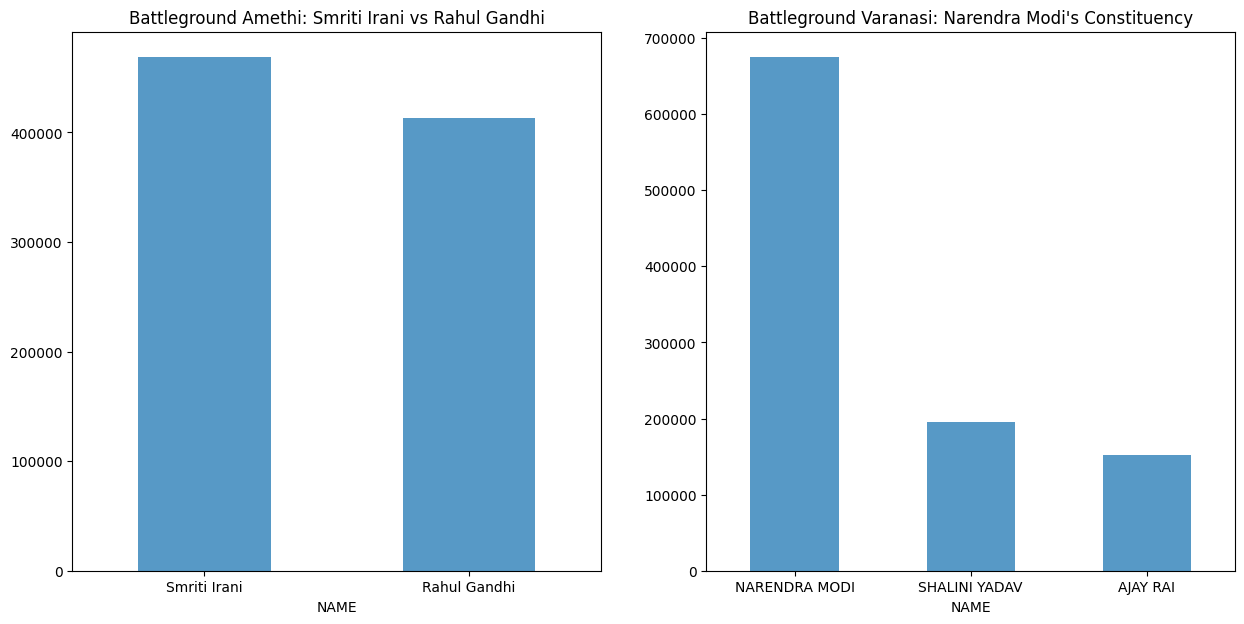

In [ ]:
# Battleground Amethi
amethi_df = df[df['CONSTITUENCY'] == 'AMETHI'][['NAME','TOTAL\nVOTES']]

# Battleground Varanasi
varanasi_df = df[df['CONSTITUENCY'] == 'VARANASI'][['NAME','TOTAL\nVOTES']]

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15,7))
amethi_df.plot(kind='bar', ax=axes[0], alpha=0.75, rot=0, legend=False, title='Battleground Amethi: Smriti Irani vs Rahul Gandhi', x='NAME')
varanasi_df.plot(kind='bar', ax=axes[1], alpha=0.75, rot=0, legend=False, title="Battleground Varanasi: Narendra Modi's Constituency", x='NAME')

1)This time things were different in Amethi. Smriti Irani defeated Rahul Gandhi by a substantial margin.

2)In Varanasi however the picture was similar with Narendra Modi winning the seat by a landslide.

# West Bengal:

West Bengal remained the newsmaker of the 2019 Lok Sabha polls, with violence including crude bombs, lathi charges and repeated political clashes and claims of attacks from candidates became the talking point in the state as polling was held in all seven phases spread across two months in the politically important state. Bengal has 42 Lok Sabha constituencies, of which the Trinamool won 34 in 2014. The Congress managed four and the Left two. The BJP secured only two, despite the Narendra Modi wave in the country that year. The state which was considered to be a bastion for the Left Wing has now become a stronghold for the Trinamool Congress.

In [ ]:
# Battleground West Bengal
bengal_df = pd.DataFrame(data=df[df['STATE'] == 'West Bengal'])
bengal_df_vote = pd.DataFrame(data=bengal_df.groupby('PARTY')['TOTAL\nVOTES'].sum())
bengal_df_vote.sort_values(by='TOTAL\nVOTES', ascending=False, inplace=True)
bengal_df_vote.reset_index(level=0, inplace=True)
bengal_df_vote['Category'] = bengal_df_vote.apply(sort_party, axis=1)
bengal_vote_count = bengal_df_vote.groupby('Category')['TOTAL\nVOTES'].sum()

vote_share_top5 = bengal_df_vote.groupby('PARTY')['TOTAL\nVOTES'].sum().nlargest(5).index.tolist()
# Visualize Party-wise vote share
bengal_fig = go.Figure(go.Pie(labels=bengal_vote_count.index,
                                  values=bengal_vote_count.values,
                                  pull=[0.1, 0.1, 0.1, 0.1, 0.1, 0.1],
                                  marker=dict(line=dict(color="#000000",
                                                        width=2))))
bengal_fig.update_layout(title_text='West Bengal : Party-wise Vote Share',
                             font_family="Courier New",
                             font_color="#351f39",
                             title_font_family="Courier New",
                             title_font_color="#351f39")
bengal_fig.show()

The Trinamool Congress recorded its best-ever performance in 2014 Lok Sabha election in West Bengal as it swept 34 of the 42 seats decimating the Left in its victory march, while the BJP made impressive inroads winning two seats. The BJP left no stone unturned in attempting to make inroads into Mamata Banerjee's bastion while the Trinamool responded by not ceding an inch. This time around BJP swept the 2019 Lok Sabha polls winning 18 seats out of 42 with a vote share of 41.6%. However it failed to dent the consolidated vote share of Mamata Banerjee's TMC

# How people voted in Bengal?

<Axes: title={'center': 'West Bengal: Education of winning candidates'}, xlabel='Education Level'>

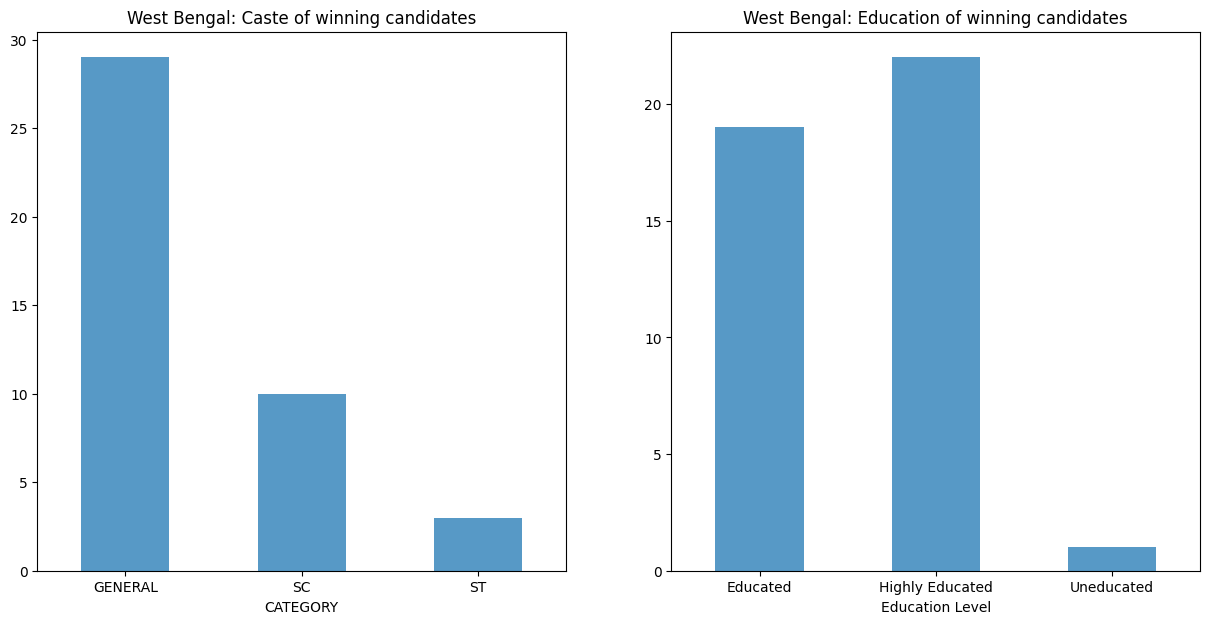

In [ ]:
# Create a dataframe containing the caste distribution of winners
winner_caste_bengal = bengal_df[bengal_df['WINNER'] == 1].groupby('CATEGORY')['WINNER'].size()
winner_caste_bengal_df= pd.DataFrame(data=winner_caste_bengal)
winner_caste_bengal_df.reset_index(level=0, inplace=True)

def education(data):
    if data['EDUCATION'] in ['5th Pass', 'Others', 'Illiterate', 'Not Available']:
        return 'Uneducated'
    elif data['EDUCATION'] in ['Graduate', 'Doctorate', 'Post Graduate']:
        return 'Highly Educated'
    else:
        return 'Educated'

bengal_df['Education Level'] = bengal_df.apply(education, axis=1)

winner_edu_bengal = bengal_df[bengal_df['WINNER'] == 1].groupby('Education Level')['WINNER'].size()
winner_edu_bengal_df= pd.DataFrame(data=winner_edu_bengal)
winner_edu_bengal_df.reset_index(level=0, inplace=True)

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15,7))
winner_caste_bengal_df.plot(kind='bar', ax=axes[0], alpha=0.75, rot=0, legend=False, title='West Bengal: Caste of winning candidates', x='CATEGORY')
winner_edu_bengal_df.plot(kind='bar', ax=axes[1], alpha=0.75, rot=0, legend=False, title='West Bengal: Education of winning candidates', x='Education Level')

1)Most of the winning candidates are from General caste.

2)When it comes to education most of the winning candidates are highly educated. The level of education of an candidate is a key factor in West Bengal

Begusarai (Bihar): The Begusarai constituency, which is among the most talked about seats in Bihar, recorded a comparatively high turnout of 61.27%, as per the EC. The constituency has been under a microscope as it is witnessing the electoral debut of CPI candidate Kanhaiya Kumar, the controversial former JNUSU president who is pitted against BJP leader and union minister Giriraj Singh. The Mahagathbandhan's nominee is Tanweer Hasan (RJD)

Bangalore South (Karnataka): The saffron bastion will see BJP's Tejasvi Surya take on Congress’ BK Hariprasad. After the untimely death of BJP leader and union minister Ananth Kumar who had held the constituency since 1996, BJP has fielded a young face in Tejasvi Surya. The late Ananth Kumar had beaten Infosys co-founder Nandan Nilekani, then a Congress candidate, in 2014.

Wayanad (Kerala): Congress chief Rahul Gandhi contesting from this constituency apart from Congress' bastion in Amethi has made the relatively new seat becoming a national talking point. Against him are PP Suneer of CPI(M) and Thushar Vellappally of Bharath Dharma Jana Sena (an ally of BJP). Interestingly, Congress chief will be fighting with three namesakes: two Independent candidates, K.E. Rahul Gandhi and K.M. Shivprasad Gandhi, and K. Raghul Gandhi of the Agila India Makkal Kazhagam party.

Bhopal (Madhya Pradesh): A BJP bastion, this constituency has taken centrestage ever since the BJP fielded Malegaon blast-accused Sadhvi Pragya from the seat against Congress veteran Digvijaya Singh. Singh has been CM of Madhya Pradesh and is contesting an election after a gap of almost 19 years, the last being the assembly election he contested in 2003. He was nominated to the Rajya Sabha in 2014 from Madhya Pradesh. The BJP however has consistently been winning the seat of Bhopal since 1989. BJP's Alok Sanjar is the sitting MP from the Bhopal Lok Sabha seat. What makes the contest especially interesting, however, is the fact that Digvijaya Singh was one of the most significant proposers of 'Saffron terror/Hindu terror' which cited the Malegaon blasts among others

<Axes: title={'center': 'Battleground Bhopal'}, xlabel='NAME'>

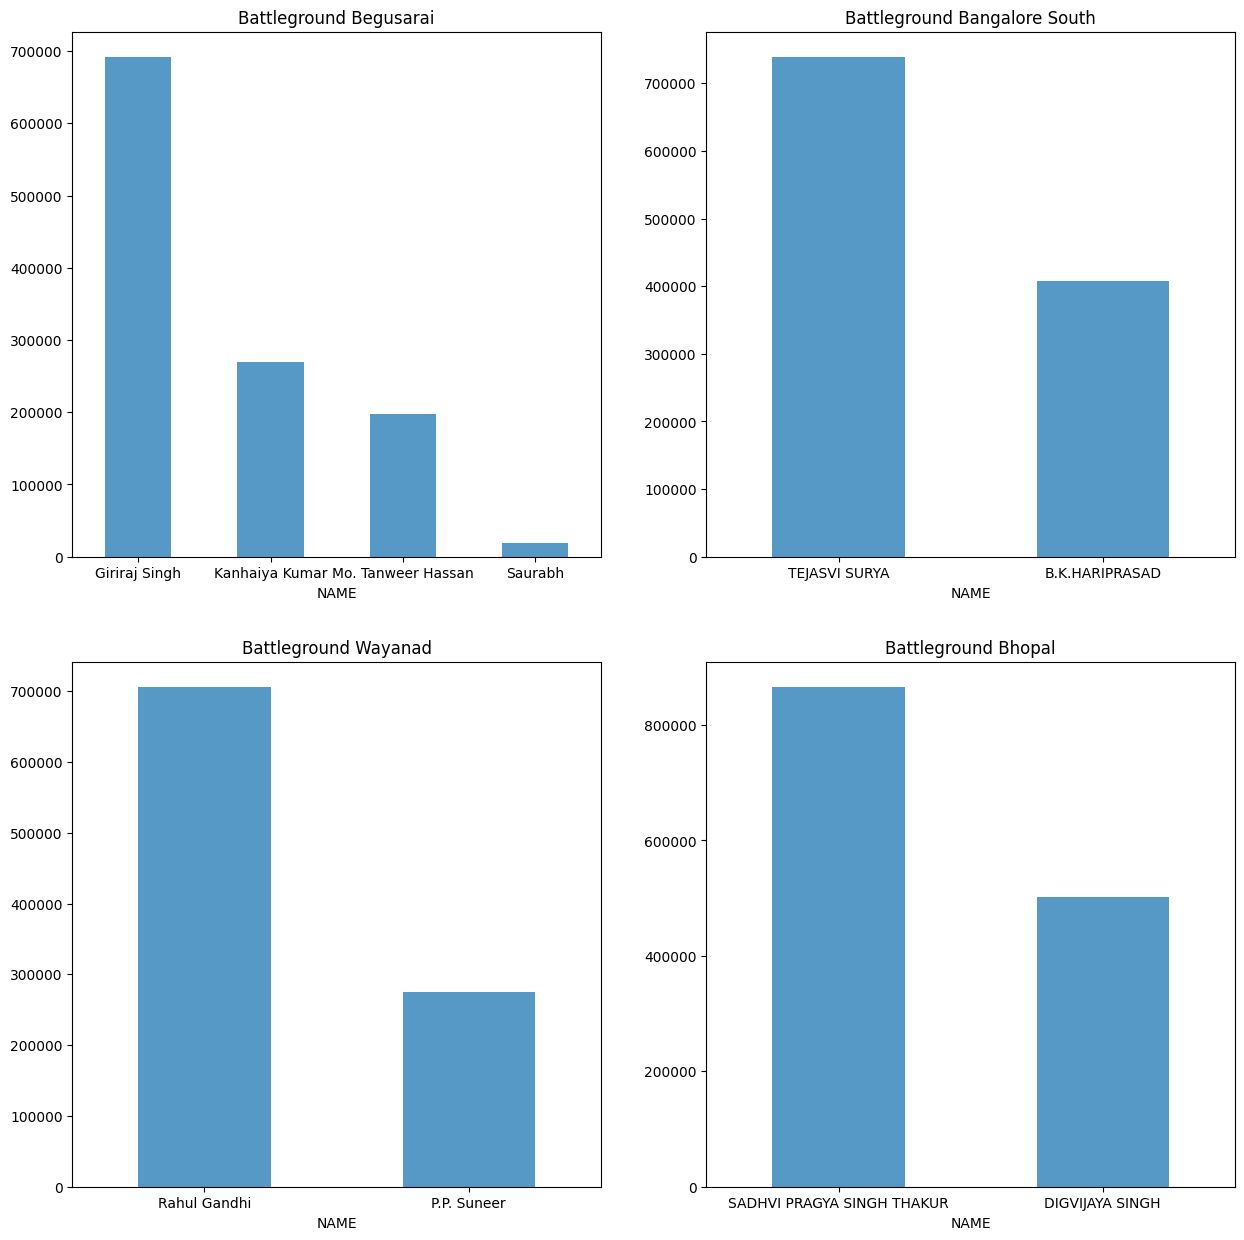

In [ ]:
begusarai_df = df[df['CONSTITUENCY'] == 'BEGUSARAI'][['NAME','TOTAL\nVOTES']]
bangalore_df = df[df['CONSTITUENCY'] == 'BANGALORE SOUTH'][['NAME','TOTAL\nVOTES']]
wayanad_df = df[df['CONSTITUENCY'] == 'WAYANAD'][['NAME','TOTAL\nVOTES']]
bhopal_df = df[df['CONSTITUENCY'] == 'BHOPAL'][['NAME','TOTAL\nVOTES']]

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15,15))
begusarai_df.plot(kind='bar', ax=axes[0,0], alpha=0.75, rot=0, legend=False, title='Battleground Begusarai', x='NAME')
bangalore_df.plot(kind='bar', ax=axes[0,1], alpha=0.75, rot=0, legend=False, title="Battleground Bangalore South", x='NAME')
wayanad_df.plot(kind='bar', ax=axes[1,0], alpha=0.75, rot=0, legend=False, title='Battleground Wayanad', x='NAME')
bhopal_df.plot(kind='bar', ax=axes[1,1], alpha=0.75, rot=0, legend=False, title="Battleground Bhopal", x='NAME')

# Preparing the data

# Scaling the data

In [ ]:
# This is the dataset which will be used for fitting Machine Learning models
df.head()

,STATE,CONSTITUENCY,NAME,WINNER,PARTY,SYMBOL,GENDER,CRIMINAL\nCASES,AGE,CATEGORY,EDUCATION,ASSETS,LIABILITIES,GENERAL\nVOTES,POSTAL\nVOTES,TOTAL\nVOTES,OVER TOTAL ELECTORS \nIN CONSTITUENCY,OVER TOTAL VOTES POLLED \nIN CONSTITUENCY,TOTAL ELECTORS,Party New
0,Telangana,ADILABAD,SOYAM BAPU RAO,1,BJP,Lotus,MALE,52.0,52.0,ST,12th Pass,"Rs 30,99,414\n ~ 30 Lacs+","Rs 2,31,450\n ~ 2 Lacs+",376892,482,377374,25.330684,35.468248,1489790,BJP
1,Telangana,ADILABAD,Godam Nagesh,0,TRS,Car,MALE,0.0,54.0,ST,Post Graduate,"Rs 1,84,77,888\n ~ 1 Crore+","Rs 8,47,000\n ~ 8 Lacs+",318665,149,318814,21.399929,29.964370,1489790,Other
2,Telangana,ADILABAD,RATHOD RAMESH,0,INC,Hand,MALE,3.0,52.0,ST,12th Pass,"Rs 3,64,91,000\n ~ 3 Crore+","Rs 1,53,00,000\n ~ 1 Crore+",314057,181,314238,21.092771,29.534285,1489790,INC
4,Uttar Pradesh,AGRA,Satyapal Singh Baghel,1,BJP,Lotus,MALE,5.0,58.0,SC,Doctorate,"Rs 7,42,74,036\n ~ 7 Crore+","Rs 86,06,522\n ~ 86 Lacs+",644459,2416,646875,33.383823,56.464615,1937690,BJP
5,Uttar Pradesh,AGRA,Manoj Kumar Soni,0,BSP,Elephant,MALE,0.0,47.0,SC,Post Graduate,"Rs 13,37,84,385\n ~ 13 Crore+","Rs 2,22,51,891\n ~ 2 Crore+",434199,1130,435329,22.466390,37.999125,1937690,BSP


In [ ]:
# Labeling parties with less than 10 candidates as others
less_candidates = []
for i, j in df['PARTY'].value_counts().items():
    if j <= 10:
        less_candidates.append(i)
len(less_candidates)

def small_party(data):
    if data in less_candidates:
        return 'Other'
    return data
df['PARTY'] = df['PARTY'].apply(small_party)
df['PARTY'].value_counts()

,count
PARTY,
BJP,420
INC,411
Other,247
IND,193
BSP,161
CPI(M),100
VBA,47
AITC,47
SP,39


In [ ]:
X = df.drop(['NAME', 'SYMBOL', 'WINNER', 'GENERAL\nVOTES', 'POSTAL\nVOTES', 'TOTAL\nVOTES', 'OVER TOTAL VOTES POLLED \nIN CONSTITUENCY',
             'OVER TOTAL VOTES POLLED \nIN CONSTITUENCY', 'Party New', 'CONSTITUENCY'], axis=1)
y = df['WINNER']
X.head()

,STATE,PARTY,GENDER,CRIMINAL\nCASES,AGE,CATEGORY,EDUCATION,ASSETS,LIABILITIES,OVER TOTAL ELECTORS \nIN CONSTITUENCY,TOTAL ELECTORS
0,Telangana,BJP,MALE,52.0,52.0,ST,12th Pass,"Rs 30,99,414\n ~ 30 Lacs+","Rs 2,31,450\n ~ 2 Lacs+",25.330684,1489790
1,Telangana,TRS,MALE,0.0,54.0,ST,Post Graduate,"Rs 1,84,77,888\n ~ 1 Crore+","Rs 8,47,000\n ~ 8 Lacs+",21.399929,1489790
2,Telangana,INC,MALE,3.0,52.0,ST,12th Pass,"Rs 3,64,91,000\n ~ 3 Crore+","Rs 1,53,00,000\n ~ 1 Crore+",21.092771,1489790
4,Uttar Pradesh,BJP,MALE,5.0,58.0,SC,Doctorate,"Rs 7,42,74,036\n ~ 7 Crore+","Rs 86,06,522\n ~ 86 Lacs+",33.383823,1937690
5,Uttar Pradesh,BSP,MALE,0.0,47.0,SC,Post Graduate,"Rs 13,37,84,385\n ~ 13 Crore+","Rs 2,22,51,891\n ~ 2 Crore+",22.466390,1937690


In [ ]:
# Creating training and test dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [ ]:
categorical = []
numerical = []

# Converting Strings to Category
for label, content in X.items():
    if pd.api.types.is_string_dtype(content):
        X[label] = content.astype("category")
        categorical.append(label)

    if pd.api.types.is_numeric_dtype(content):
        numerical.append(label)

In [ ]:
# Initializing the StandardScaler()
scaler = MinMaxScaler()
encoder = OrdinalEncoder()

# Encoding the categorical columns
for cat in categorical:
    label_fit = encoder.fit(np.array(X[cat]).reshape(-1, 1))
    X_train[cat] = label_fit.transform(np.array(X_train[cat]).reshape(-1, 1))
    X_test[cat] = label_fit.transform(np.array(X_test[cat]).reshape(-1, 1))

# Scaling the dataset
scaler_fit = scaler.fit(X[numerical])
X_train[numerical] = scaler_fit.transform(X_train[numerical])
X_test[numerical] = scaler_fit.transform(X_test[numerical])
# Encoding the target
target_enc = LabelEncoder().fit(y_train)
y_train = target_enc.transform(y_train)
y_test = target_enc.transform(y_test)

# Upsampling the dataset

In [ ]:
Counter(y_train)

Counter({1: 382, 0: 1015})

In [ ]:
oversample = SMOTE()
X_train, y_train = oversample.fit_resample(X_train, y_train)
counter = Counter(y_train)
print(counter)

Counter({1: 1015, 0: 1015})


# Machine learning model experimentation

In [ ]:
!pip install catboost

In [ ]:
import numpy as np
import pandas as pd
import time
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
import xgboost as xgb
from catboost import CatBoostClassifier
import lightgbm as lgb
from catboost import CatBoostClassifier
np.random.seed(42)

# Create a dictionary of the models to experiment
models = {
          "Random Forest" : RandomForestClassifier(n_jobs=-1),
          "Support Vector Machines" : SVC(),
          "K-Nearest Neighbors" : KNeighborsClassifier(),
          "Logistic Regression"  : LogisticRegression(),
          "XG Boosting" : xgb.XGBClassifier(n_jobs=-1),
          "Cat Boosting": CatBoostClassifier(),
          "Gradient Boosting"  : GradientBoostingClassifier(),
          "ADA Boosting" : AdaBoostClassifier(),
          "LG Boosting" : lgb.LGBMClassifier(),
          "Decision Trees" : DecisionTreeClassifier()
         }

# Create a function to fit and score the models
def fit_and_score(models, X_train, y_train, X_test, y_test):
    '''
    Fits and evaluates the machine learning models.
    models : a dict of different Scikit-Learn machine learning models.
    X_train : training data (no labels)
    y_train : training lables
    X_test : testing data (no labels)
    y_test : testing lables
    '''
    train_model_scores_acc = {}
    train_model_scores_pre = {}
    train_model_scores_rec = {}
    train_model_scores_f1 = {}

    test_model_scores_acc = {}
    test_model_scores_pre = {}
    test_model_scores_rec = {}
    test_model_scores_f1 = {}

    train_model_timing = {}

    for name, model in models.items():
        start = time.time()
        train_model_scores_acc[name] = np.mean(cross_val_score(model, X_train, y_train, cv=10, n_jobs=-1, scoring='accuracy')) * 100
        train_model_scores_pre[name] = np.mean(cross_val_score(model, X_train, y_train, cv=10, n_jobs=-1, scoring='precision')) * 100
        train_model_scores_rec[name] = np.mean(cross_val_score(model, X_train, y_train, cv=10, n_jobs=-1, scoring='recall')) * 100
        train_model_scores_f1[name] = np.mean(cross_val_score(model, X_train, y_train, cv=10, n_jobs=-1, scoring='f1')) * 100
        stop = time.time()
        timing = stop - start
        train_model_timing[name] = timing

        model.fit(X_train, y_train)
        pred = model.predict(X_test)

        test_model_scores_acc[name] = accuracy_score(y_test, pred) * 100
        test_model_scores_pre[name] = precision_score(y_test, pred) * 100
        test_model_scores_rec[name] = recall_score(y_test, pred) * 100
        test_model_scores_f1[name] = f1_score(y_test, pred) * 100

    # Create dictionary for oil scores
    scores = {'Training Accuracy': train_model_scores_acc,
              'Training Precision': train_model_scores_pre,
              'Training Recall': train_model_scores_rec,
              'Training F1': train_model_scores_f1,
              'Test Accuracy':  test_model_scores_acc,
              'Test Precision': test_model_scores_pre,
              'Test Recall': test_model_scores_rec,
              'Test F1': test_model_scores_f1,
              '10-Fold CV Timing (seconds)': train_model_timing
             }

    # Create dataframe of scores
    scores_df = pd.DataFrame(scores)

    scores_df.rename_axis('Model', inplace=True)
    scores_df.reset_index(inplace=True)
    scores_df.sort_values('Test Accuracy', ascending=False, inplace=True)
    return scores_df


In [ ]:
models["Logistic Regression"] = LogisticRegression(max_iter=1000)


In [ ]:
from sklearn.preprocessing import StandardScaler

# Scale your data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

def fit_and_score(models, X_train, y_train, X_test, y_test):
    train_model_scores_acc = {}
    train_model_scores_pre = {}
    train_model_scores_rec = {}
    train_model_scores_f1 = {}

    test_model_scores_acc = {}
    test_model_scores_pre = {}
    test_model_scores_rec = {}
    test_model_scores_f1 = {}

    train_model_timing = {}

    for name, model in models.items():
        try:
            start = time.time()
            train_model_scores_acc[name] = np.mean(cross_val_score(model, X_train, y_train, cv=10, n_jobs=-1, scoring='accuracy')) * 100
            train_model_scores_pre[name] = np.mean(cross_val_score(model, X_train, y_train, cv=10, n_jobs=-1, scoring='precision')) * 100
            train_model_scores_rec[name] = np.mean(cross_val_score(model, X_train, y_train, cv=10, n_jobs=-1, scoring='recall')) * 100
            train_model_scores_f1[name] = np.mean(cross_val_score(model, X_train, y_train, cv=10, n_jobs=-1, scoring='f1')) * 100
            stop = time.time()
            timing = stop - start
            train_model_timing[name] = timing

            model.fit(X_train, y_train)
            pred = model.predict(X_test)

            test_model_scores_acc[name] = accuracy_score(y_test, pred) * 100
            test_model_scores_pre[name] = precision_score(y_test, pred) * 100
            test_model_scores_rec[name] = recall_score(y_test, pred) * 100
            test_model_scores_f1[name] = f1_score(y_test, pred) * 100

        except Exception as e:
            print(f"Error with model {name}: {e}")

    # Create dictionary for all scores
    scores = {'Training Accuracy': train_model_scores_acc,
              'Training Precision': train_model_scores_pre,
              'Training Recall': train_model_scores_rec,
              'Training F1': train_model_scores_f1,
              'Test Accuracy':  test_model_scores_acc,
              'Test Precision': test_model_scores_pre,
              'Test Recall': test_model_scores_rec,
              'Test F1': test_model_scores_f1,
              '10-Fold CV Timing (seconds)': train_model_timing
             }

    # Create dataframe of scores
    scores_df = pd.DataFrame(scores)

    scores_df.rename_axis('Model', inplace=True)
    scores_df.reset_index(inplace=True)
    scores_df.sort_values('Test Accuracy', ascending=False, inplace=True)
    return scores_df


In [ ]:
scores_df=fit_and_score(models, X_train, y_train, X_test, y_test)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



Learning rate set to 0.013939
0:	learn: 0.6770876	total: 51ms	remaining: 51s
1:	learn: 0.6608742	total: 55.7ms	remaining: 27.8s
2:	learn: 0.6442928	total: 60.2ms	remaining: 20s
3:	learn: 0.6299740	total: 64.4ms	remaining: 16s
4:	learn: 0.6159960	total: 68.7ms	remaining: 13.7s
5:	learn: 0.6030235	total: 72.8ms	remaining: 12.1s
6:	learn: 0.5905199	total: 77.6ms	remaining: 11s
7:	learn: 0.5742372	total: 82.9ms	remaining: 10.3s
8:	learn: 0.5638022	total: 88.2ms	remaining: 9.71s
9:	learn: 0.5497252	total: 93.8ms	remaining: 9.28s
10:	learn: 0.5397392	total: 98.9ms	remaining: 8.89s
11:	learn: 0.5296805	total: 104ms	remaining: 8.53s
12:	learn: 0.5208899	total: 108ms	remaining: 8.23s
13:	learn: 0.5087007	total: 113ms	remaining: 7.97s
14:	learn: 0.4993328	total: 118ms	remaining: 7.72s
15:	learn: 0.4899399	total: 123ms	remaining: 7.57s
16:	learn: 0.4796277	total: 128ms	remaining: 7.41s
17:	learn: 0.4693793	total: 133ms	remaining: 7.26s
18:	learn: 0.4615556	total: 138ms	remaining: 7.11s
19:	learn:

In [ ]:
scores_df


,Model,Training Accuracy,Training Precision,Training Recall,Training F1,Test Accuracy,Test Precision,Test Recall,Test F1,10-Fold CV Timing (seconds)
4,XG Boosting,93.793103,92.795934,95.091244,93.826855,92.487479,83.333333,89.171975,86.153846,7.729686
7,ADA Boosting,92.364532,91.870186,93.021743,92.374855,92.153589,81.609195,90.445860,85.800604,9.420343
5,Cat Boosting,93.694581,92.155448,95.583382,93.775682,91.986644,80.790960,91.082803,85.628743,225.351373
6,Gradient Boosting,92.758621,92.255279,93.613861,92.934790,91.986644,81.142857,90.445860,85.542169,22.165159
0,Random Forest,92.807882,91.747561,95.186372,93.269692,91.819699,80.000000,91.719745,85.459941,31.188658
8,Decision Trees,90.492611,90.186957,91.453116,91.017439,88.480801,76.829268,80.254777,78.504673,0.852216
3,Logistic Regression,90.788177,87.369561,95.466900,91.208773,86.310518,66.968326,94.267516,78.306878,19.555724
1,Support Vector Machines,53.251232,53.176095,54.115706,53.377546,53.088481,29.738562,57.961783,39.308855,15.606697
2,K-Nearest Neighbors,66.403941,63.955456,75.198990,69.011412,52.754591,26.136364,43.949045,32.779097,1.593043


# Evaluation

In [ ]:
# Fitting the final model
final_model = xgb.XGBClassifier(n_jobs=-1)
final_model.fit(X_train, y_train)

# Making predictions
pred = final_model.predict(X_test)

<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

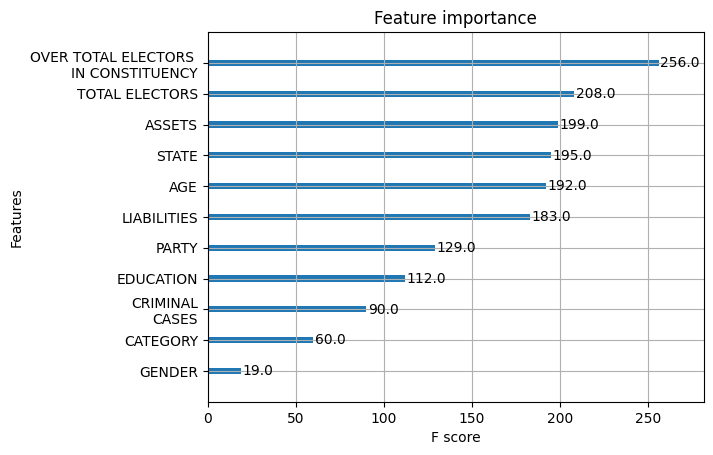

In [ ]:
xgb.plot_importance(final_model)

# Classification report

In [ ]:
from sklearn.metrics import classification_report

# Assuming 'pred' contains the predictions from your model on the test data
print(classification_report(y_test, pred))


              precision    recall  f1-score   support

           0       0.96      0.94      0.95       442
           1       0.83      0.89      0.86       157

    accuracy                           0.92       599
   macro avg       0.90      0.91      0.90       599
weighted avg       0.93      0.92      0.93       599



# Confusion matrix

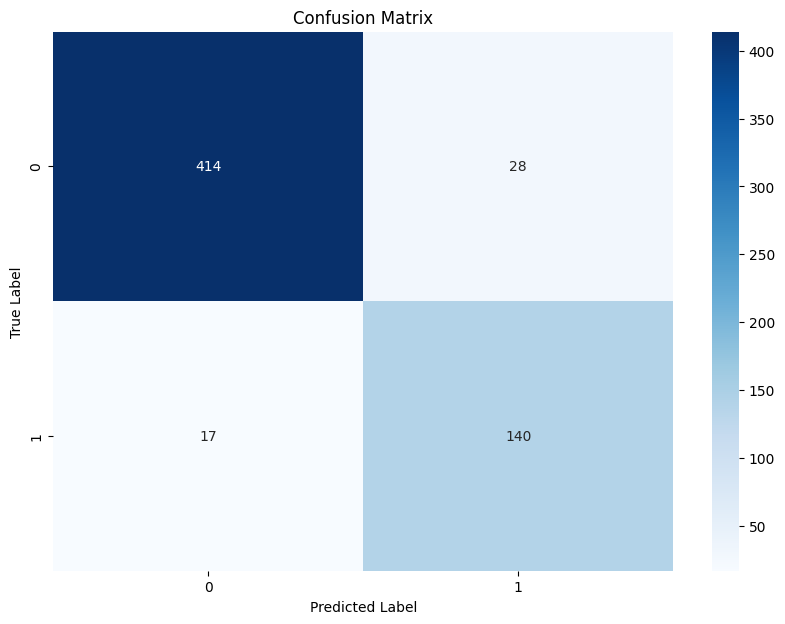

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Generate the confusion matrix
cm = confusion_matrix(y_test, pred)

# Plot the confusion matrix using Seaborn's heatmap
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')

# Add labels to the plot
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')

# Show the plot
plt.show()


# ROC curve

In [ ]:
!pip install --upgrade scikit-learn


In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt



In [ ]:
# Get the predicted probabilities for the positive class
y_prob = final_model.predict_proba(X_test)[:, 1]

# Compute ROC curve
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()


# Conclusion
**Final Results**

Accuracy : 87%

Precision : 87%

Recall : 87%

F1 Score : 87%

AUC : 0.90